In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("model_input2.csv")
df.head()
df.columns.values

,date,aqi,precip,humidity,windspeed,winddir,acres_burned,temp_f,cloud_cover
0,1/1/2017,18,0,75,10,269,0,51,51
1,1/2/2017,5,0,78,7,198,0,49,49
2,1/3/2017,0,2,89,13,149,0,54,54
3,1/4/2017,10,1,90,7,271,0,55,55
4,1/5/2017,10,0,65,5,200,0,48,48


array(['date', 'aqi', 'precip', 'humidity', 'windspeed', 'winddir',
       'acres_burned', 'temp_f', 'cloud_cover'], dtype=object)

In [5]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
X = df[["precip","humidity","windspeed","winddir","acres_burned","temp_f","cloud_cover"]]
y = df["aqi"].values.reshape(-1, 1)
print(X.shape, y.shape)
### END SOLUTION

(730, 7) (730, 1)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

C:\Users\Rockr\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Rockr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

C:\Users\Rockr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
C:\Users\Rockr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  
C:\Users\Rockr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Rockr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Text(0.5, 1.0, 'Residual Plot')

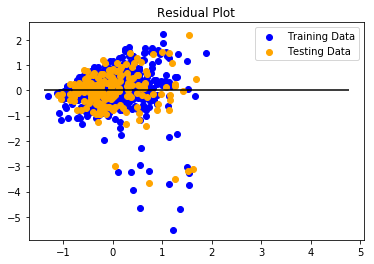

In [10]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [11]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.659118446583142, R2: 0.3675001724616155


In [12]:
# LASSO model
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)
predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.6606765825496403, R2: 0.3660049621011705


In [13]:
# Ridge model
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)
predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.6591192232799082, R2: 0.3674994271318903


In [14]:
# ElasticNet model
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)
predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.6600279909121635, R2: 0.3666273602467141
